In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc



from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB




In [ ]:
df = pd.read_csv("/content/HR.csv")

In [ ]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [ ]:
#preprocessing

In [ ]:
df.columns = [x.lower() for x in df.columns]
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns = [x.replace('-', '_') for x in df.columns]

In [ ]:
df.isnull().sum()

empid                        0
age                          0
agegroup                     0
attrition                    0
businesstravel               0
dailyrate                    0
department                   0
distancefromhome             0
education                    0
educationfield               0
employeecount                0
employeenumber               0
environmentsatisfaction      0
gender                       0
hourlyrate                   0
jobinvolvement               0
joblevel                     0
jobrole                      0
jobsatisfaction              0
maritalstatus                0
monthlyincome                0
salaryslab                   0
monthlyrate                  0
numcompaniesworked           0
over18                       0
overtime                     0
percentsalaryhike            0
performancerating            0
relationshipsatisfaction     0
standardhours                0
stockoptionlevel             0
totalworkingyears            0
training

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   empid                     1480 non-null   object 
 1   age                       1480 non-null   int64  
 2   agegroup                  1480 non-null   object 
 3   attrition                 1480 non-null   object 
 4   businesstravel            1480 non-null   object 
 5   dailyrate                 1480 non-null   int64  
 6   department                1480 non-null   object 
 7   distancefromhome          1480 non-null   int64  
 8   education                 1480 non-null   int64  
 9   educationfield            1480 non-null   object 
 10  employeecount             1480 non-null   int64  
 11  employeenumber            1480 non-null   int64  
 12  environmentsatisfaction   1480 non-null   int64  
 13  gender                    1480 non-null   object 
 14  hourlyra

In [ ]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.columns

Index(['empid', 'age', 'agegroup', 'attrition', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'salaryslab',
       'monthlyrate', 'numcompaniesworked', 'over18', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [ ]:
df.shape

(1480, 38)

In [ ]:
df.nunique()

empid                       1470
age                           43
agegroup                       5
attrition                      2
businesstravel                 4
dailyrate                    886
department                     3
distancefromhome              29
education                      5
educationfield                 6
employeecount                  1
employeenumber              1470
environmentsatisfaction        4
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1349
salaryslab                     4
monthlyrate                 1427
numcompaniesworked            10
over18                         1
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
standardhours                  1
stockoptio

In [ ]:
#Drop the features with just 1 unique value which doesn't have any impact
df.drop(['employeecount','over18','standardhours'], axis = 1, inplace = True)
df.head()

,empid,age,agegroup,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,3,4,0,0,0,3,0,0,0,0.0


In [ ]:
##Remove leaky features for better models -
del(df['empid'])


In [ ]:
# Outliers

In [ ]:
num_cols = []

for c in df.columns:
    if df[c].dtype == 'int':
        if df[c].nunique() > 5:
            num_cols.append(c)

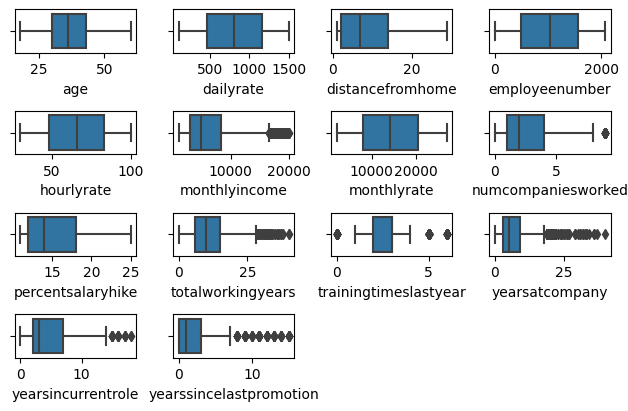

In [ ]:
for i,col in enumerate(num_cols):
    axes = plt.subplot(5,4, i + 1)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
# removing outliers

for i in df.columns:
    if df[i].dtype == 'int64':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5*iqr
        high = q3 + 1.5*iqr
        df[i] = df[i].clip(lower=low, upper=high)

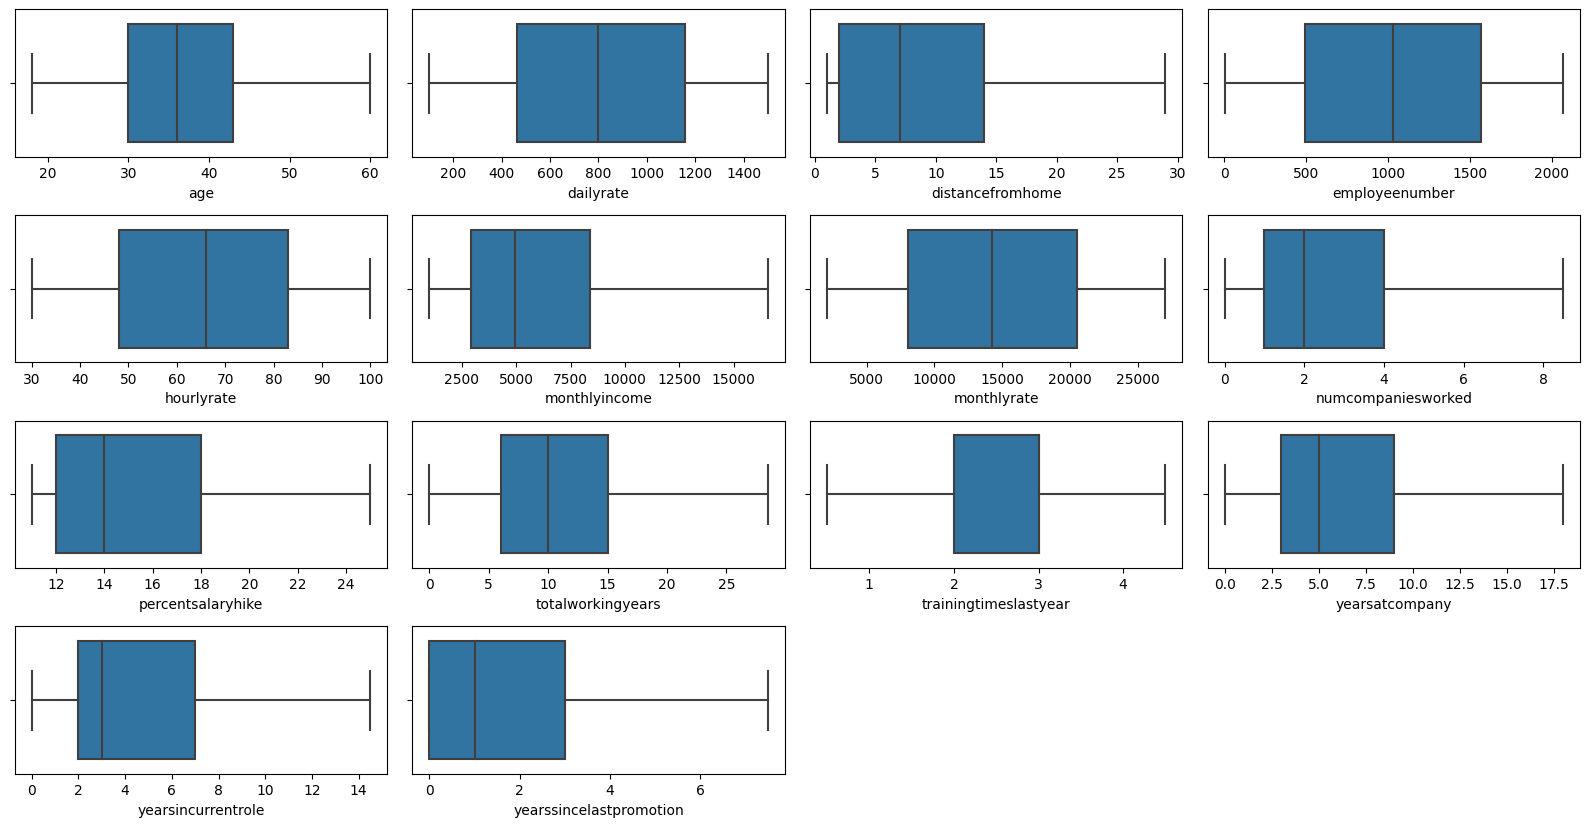

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(num_cols):
    axes = plt.subplot(5,4, i + 1)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [ ]:
##Cheking for duplicates
##value=len(df[df.duplicated()])
#print(value)

In [ ]:
#Cheking for missing values
df.isnull().sum()

age                          0
agegroup                     0
attrition                    0
businesstravel               0
dailyrate                    0
department                   0
distancefromhome             0
education                    0
educationfield               0
employeenumber               0
environmentsatisfaction      0
gender                       0
hourlyrate                   0
jobinvolvement               0
joblevel                     0
jobrole                      0
jobsatisfaction              0
maritalstatus                0
monthlyincome                0
salaryslab                   0
monthlyrate                  0
numcompaniesworked           0
overtime                     0
percentsalaryhike            0
performancerating            0
relationshipsatisfaction     0
stockoptionlevel             0
totalworkingyears            0
trainingtimeslastyear        0
worklifebalance              0
yearsatcompany               0
yearsincurrentrole           0
yearssin

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Statistical summary


In [ ]:
df.describe()

,age,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.00000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,...,1423.0,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000
mean,36.924807,802.000000,9.262825,2.907238,1063.66409,2.726634,66.000703,2.726634,2.070274,2.725228,...,3.0,2.701335,0.768798,11.120520,2.711525,2.761771,6.643008,4.232959,1.940267,4.118060
std,9.133367,404.008071,8.146760,1.023547,595.37789,1.089736,20.373292,0.712882,1.107122,1.100302,...,0.0,1.081122,0.781482,7.329308,1.036035,0.710698,4.987371,3.561300,2.492947,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.0,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,550.50000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.0,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1066.00000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.0,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1587.50000,4.000000,84.000000,3.000000,3.000000,4.000000,...,3.0,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.00000,4.000000,100.000000,4.000000,5.000000,4.000000,...,3.0,4.000000,2.500000,28.500000,4.500000,4.000000,18.000000,14.500000,7.500000,17.000000


In [ ]:
df.dtypes

age                           int64
agegroup                     object
attrition                    object
businesstravel               object
dailyrate                     int64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeenumber                int64
environmentsatisfaction       int64
gender                       object
hourlyrate                    int64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                 int64
salaryslab                   object
monthlyrate                   int64
numcompaniesworked          float64
overtime                     object
percentsalaryhike             int64
performancerating             int64
relationshipsatisfaction      int64
stockoptionlevel            float64
totalworkingyears           

In [ ]:
df['attrition'].value_counts()
attrition_viz = df['attrition'].value_counts()
df['attrition'].value_counts()


No     1193
Yes     230
Name: attrition, dtype: int64

In [ ]:
# Data Visualization


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dailyrate'}>,
        <Axes: title={'center': 'distancefromhome'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'employeenumber'}>],
       [<Axes: title={'center': 'environmentsatisfaction'}>,
        <Axes: title={'center': 'hourlyrate'}>,
        <Axes: title={'center': 'jobinvolvement'}>,
        <Axes: title={'center': 'joblevel'}>,
        <Axes: title={'center': 'jobsatisfaction'}>],
       [<Axes: title={'center': 'monthlyincome'}>,
        <Axes: title={'center': 'monthlyrate'}>,
        <Axes: title={'center': 'numcompaniesworked'}>,
        <Axes: title={'center': 'percentsalaryhike'}>,
        <Axes: title={'center': 'performancerating'}>],
       [<Axes: title={'center': 'relationshipsatisfaction'}>,
        <Axes: title={'center': 'stockoptionlevel'}>,
        <Axes: title={'center': 'totalworkingyears'}>,
        <Axes: title={'center': 'trainingtimeslastyear'}>,


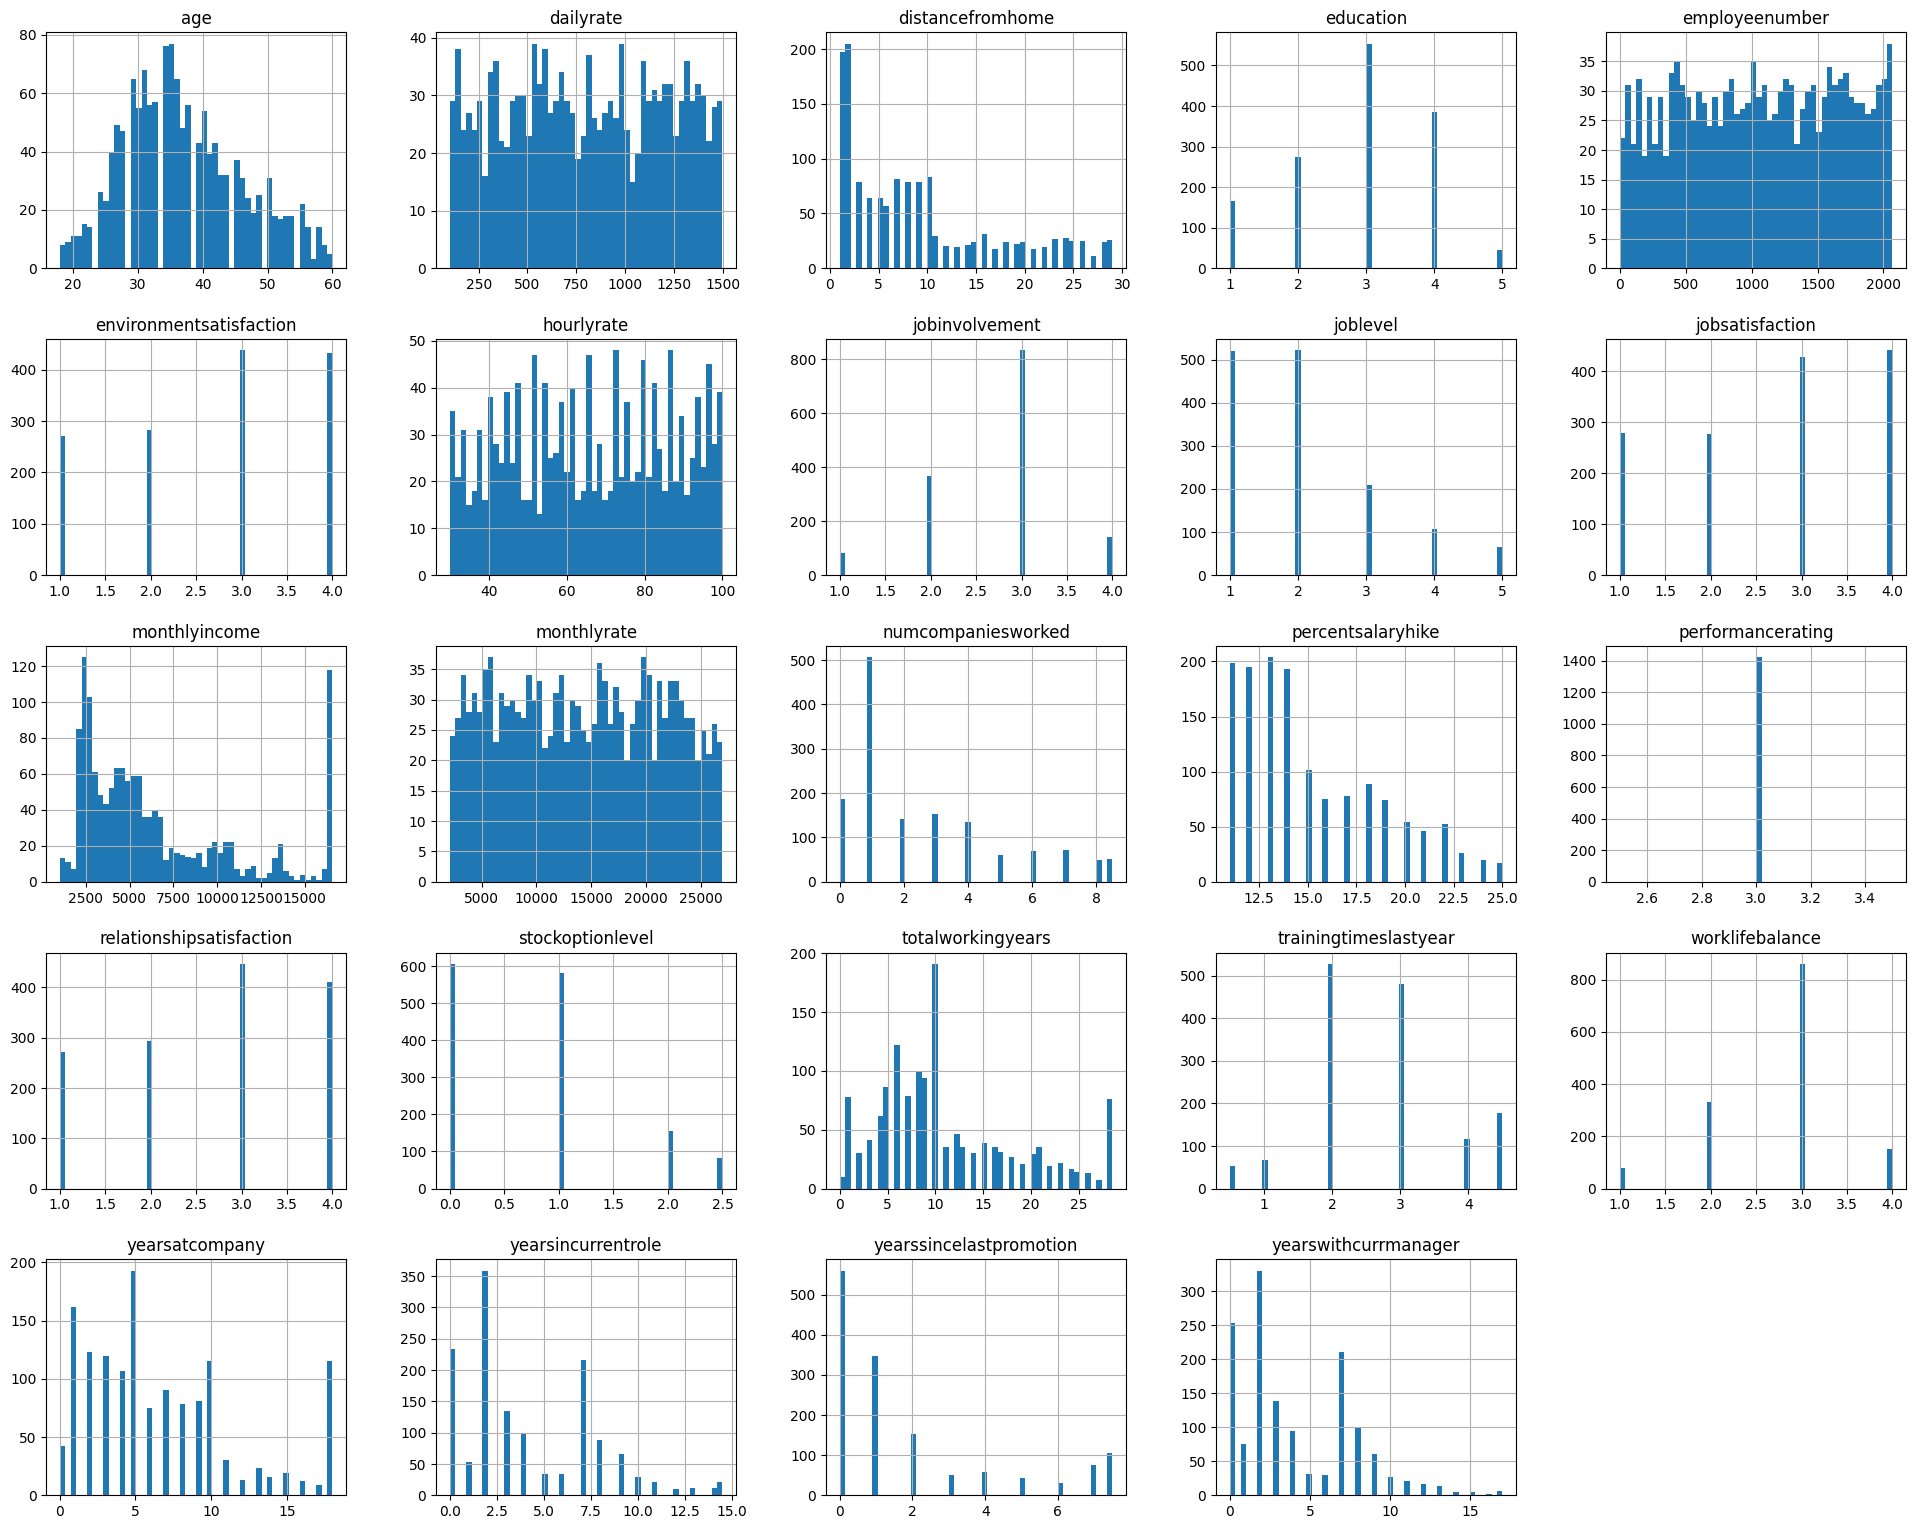

In [ ]:
df.hist(bins=50, figsize=(24, 19))


<Axes: xlabel='attrition', ylabel='count'>

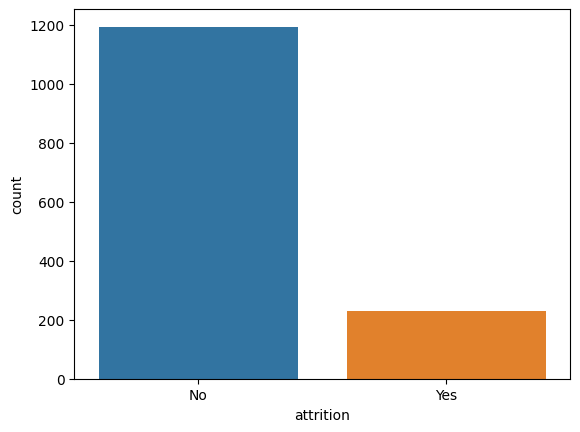

In [ ]:

sns.countplot(x='attrition', data=df, order=df['attrition'].value_counts().index)


In [ ]:
attrition_viz

No     1193
Yes     230
Name: attrition, dtype: int64

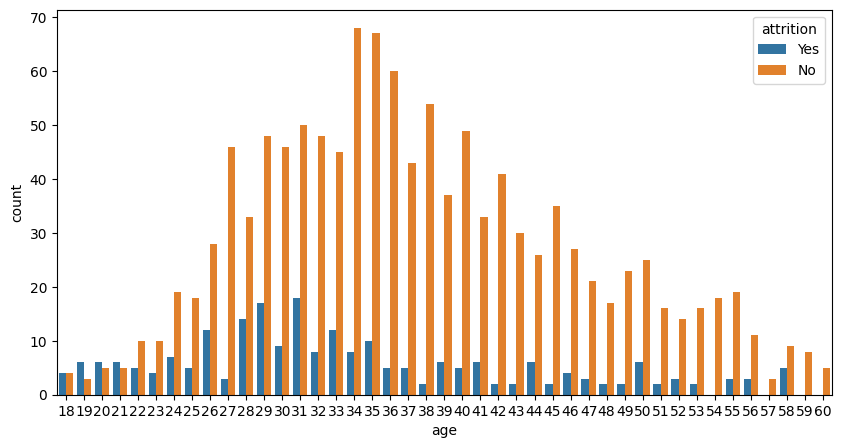

In [ ]:
# Attrition amoung age

def plot_cat(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='attrition', data=df)
    plt.show()

plot_cat('age')

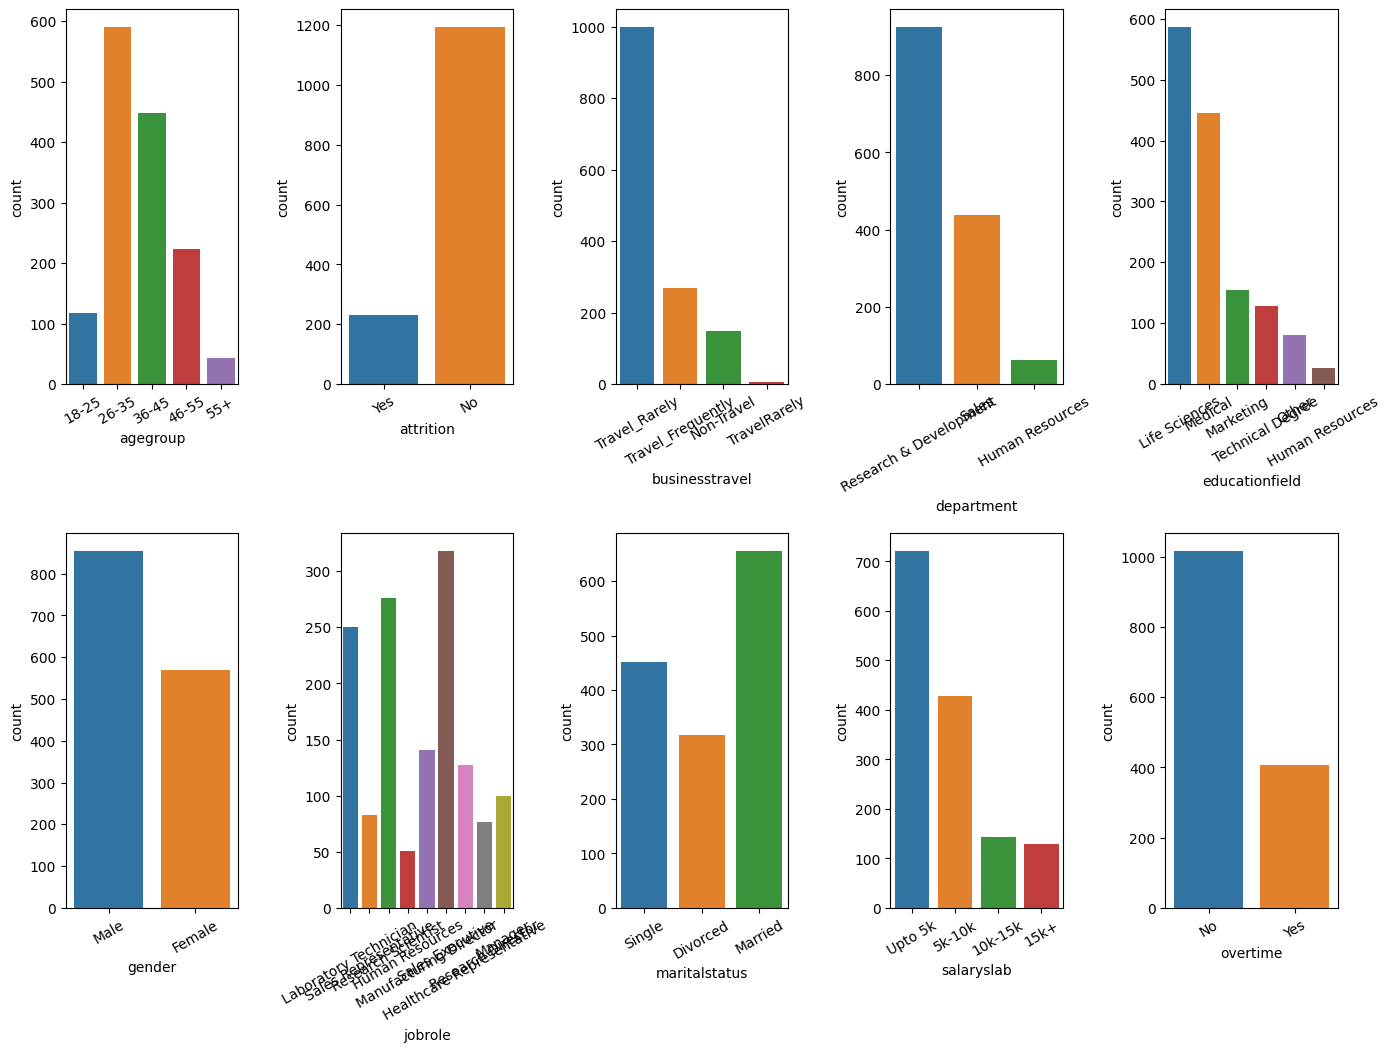

In [ ]:
obj_col = df.select_dtypes(include = 'object')

plt.figure(figsize=(14,25))
for i,col in enumerate(obj_col):
    ax = plt.subplot(5,5,i+1)
    sns.countplot(x=df[col])
    plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

In [ ]:
#sns.lineplot(data=df, x='YearsInCurrentRole', y='MonthlyIncome')

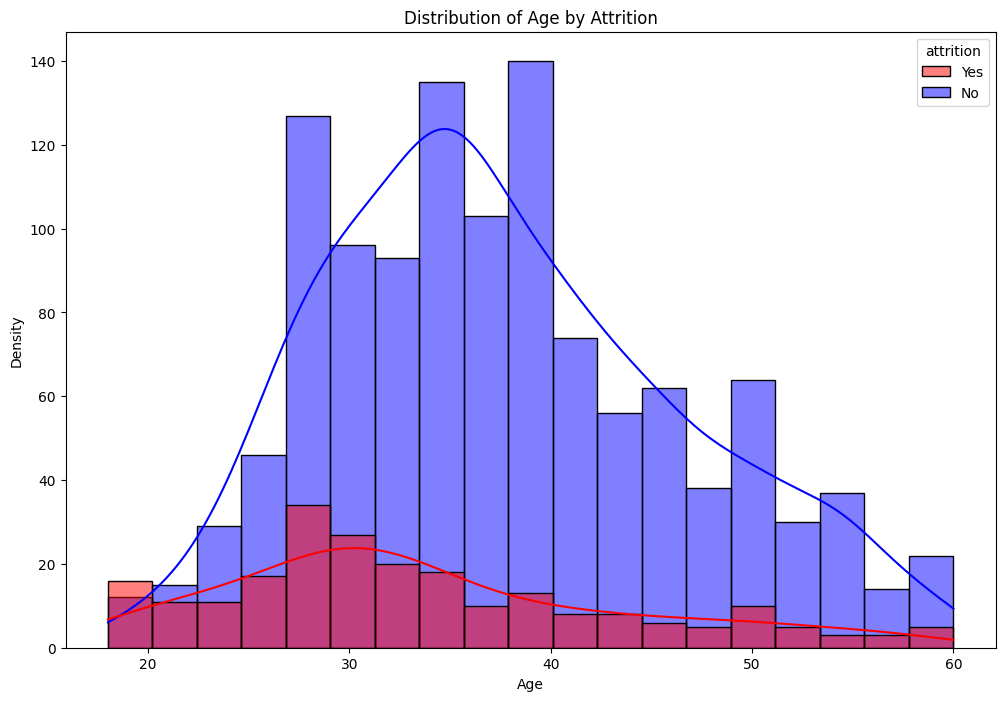

In [ ]:


plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='age', hue='attrition', kde=True, palette={'Yes': 'red', 'No': 'blue'})

plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

In [ ]:
df.corr()

<ipython-input-1003-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
age,1.000000,0.012164,0.010473,0.206874,-0.012972,0.006907,0.018266,0.025463,0.516487,-0.001008,...,NaN,0.056978,0.043279,0.682924,0.003466,-0.017604,0.287920,0.215412,0.197208,0.209987
dailyrate,0.012164,1.000000,-0.008461,-0.007906,-0.059837,0.019502,0.020043,0.043960,0.004357,0.036279,...,NaN,0.009438,0.041694,0.026445,-0.001988,-0.031798,-0.024264,0.009484,-0.036091,-0.022281
distancefromhome,0.010473,-0.008461,1.000000,0.032696,0.034211,-0.014319,0.030086,0.008263,0.012219,-0.014689,...,NaN,0.003888,0.051967,0.018460,-0.040419,-0.030110,0.016624,0.022636,0.013637,0.010849
education,0.206874,-0.007906,0.032696,1.000000,0.044315,-0.037251,0.026307,0.039433,0.089535,-0.014530,...,NaN,-0.005989,0.020205,0.138306,-0.021936,0.010203,0.057842,0.052620,0.050467,0.068713
employeenumber,-0.012972,-0.059837,0.034211,0.044315,1.000000,0.020162,0.022655,-0.003224,-0.024625,-0.055772,...,NaN,-0.069284,0.049000,-0.014506,0.021911,0.008004,-0.000688,-0.017674,-0.018377,-0.009781
environmentsatisfaction,0.006907,0.019502,-0.014319,-0.037251,0.020162,1.000000,-0.058400,-0.011170,0.003694,-0.008144,...,NaN,0.015412,0.008309,-0.008287,-0.002938,0.025723,0.006228,0.022310,0.016506,0.003072
hourlyrate,0.018266,0.020043,0.030086,0.026307,0.022655,-0.058400,1.000000,0.037587,-0.020268,-0.061384,...,NaN,0.004160,0.053676,0.005090,-0.004938,-0.000668,-0.010594,-0.010465,-0.030966,-0.003166
jobinvolvement,0.025463,0.043960,0.008263,0.039433,-0.003224,-0.011170,0.037587,1.000000,-0.010392,-0.012450,...,NaN,0.035421,0.025956,-0.001496,-0.009728,-0.009260,0.002399,0.015130,-0.001281,0.037990
joblevel,0.516487,0.004357,0.012219,0.089535,-0.024625,0.003694,-0.020268,-0.010392,1.000000,-0.000879,...,NaN,0.007559,0.019605,0.788080,-0.021858,0.039167,0.506855,0.383688,0.317978,0.371987
jobsatisfaction,-0.001008,0.036279,-0.014689,-0.014530,-0.055772,-0.008144,-0.061384,-0.012450,-0.000879,1.000000,...,NaN,-0.018195,0.017257,-0.013506,-0.010668,-0.009126,0.001335,-0.004561,-0.007398,-0.031069


<ipython-input-1004-fcffd46d82d4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

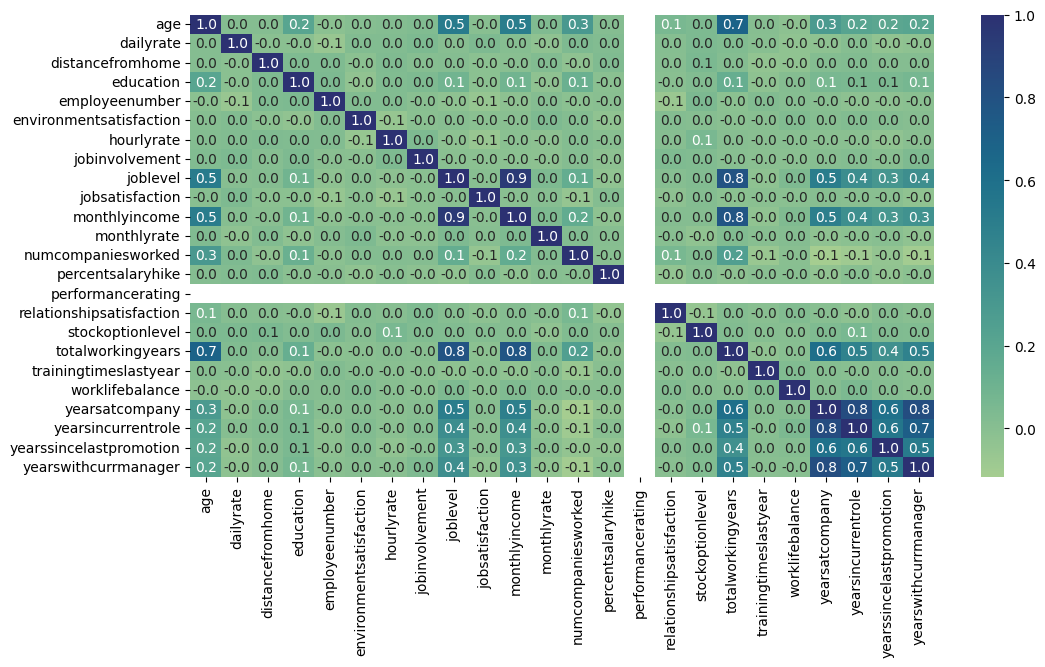

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt='.1f', cmap = "crest")

In [ ]:
 #Model Building

# Encoding the categorical variables

label = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label.fit_transform(df[i])

In [ ]:
df.dtypes

age                           int64
agegroup                      int64
attrition                     int64
businesstravel                int64
dailyrate                     int64
department                    int64
distancefromhome              int64
education                     int64
educationfield                int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                    int64
jobinvolvement                int64
joblevel                      int64
jobrole                       int64
jobsatisfaction               int64
maritalstatus                 int64
monthlyincome                 int64
salaryslab                    int64
monthlyrate                   int64
numcompaniesworked          float64
overtime                      int64
percentsalaryhike             int64
performancerating             int64
relationshipsatisfaction      int64
stockoptionlevel            float64
totalworkingyears           

In [ ]:
df.shape

(1423, 34)

In [ ]:
X = df.drop(['attrition'], axis=1)
y = df['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df1.dropna


<bound method DataFrame.dropna of       age agegroup attrition     businesstravel  dailyrate  \
0      18    18-25       Yes      Travel_Rarely        230   
1      18    18-25        No      Travel_Rarely        812   
2      18    18-25       Yes  Travel_Frequently       1306   
3      18    18-25        No         Non-Travel        287   
4      18    18-25       Yes         Non-Travel        247   
...   ...      ...       ...                ...        ...   
1475   60      55+        No      Travel_Rarely        422   
1476   60      55+        No  Travel_Frequently       1499   
1477   60      55+        No      Travel_Rarely       1179   
1478   60      55+        No      Travel_Rarely        696   
1479   60      55+        No      Travel_Rarely        370   

                  department  distancefromhome  education educationfield  \
0     Research & Development                 3          3  Life Sciences   
1                      Sales                10          3        Medi

In [ ]:
#ML

In [ ]:

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Naive Bayes']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Model,Accuracy,ROC AUC
2,Random Forest,0.866667,0.604167
0,Logistic Regression,0.831579,0.500000
3,SVC,0.831579,0.500000
4,Naive Bayes,0.740351,0.702664
1,Decision Tree,0.736842,0.551028


In [ ]:
# hyperparameter tuning of all models

for i in models:
    hyperparameters = dict()
    if i == LogisticRegression():
        hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == DecisionTreeClassifier():
        hyperparameters = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == RandomForestClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
    elif i == SVC():
        hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == GaussianNB():
        hyperparameters = {}
    clf = GridSearchCV(i, hyperparameters, cv=5)
    best_model = clf.fit(X_train, y_train)
    print(best_model.best_estimator_)
    print(best_model.best_score_)
    print(best_model.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

LogisticRegression()
0.8427119561017079
{}
DecisionTreeClassifier()
0.7820851688693098
{}
RandomForestClassifier()
0.8532691861813124
{}
SVC()
0.8400726485818069
{}
GaussianNB()
0.7310765901537986
{}


In [ ]:
models = [LogisticRegression(C=0.001, penalty='l2'), DecisionTreeClassifier(criterion='entropy', max_depth=3), RandomForestClassifier(max_features='auto', n_estimators=100), SVC(C=0.001, kernel='linear'), GaussianNB()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Naive Bayes']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



,Model,Accuracy,ROC AUC
2,Random Forest,0.870175,0.614583
1,Decision Tree,0.856140,0.631065
0,Logistic Regression,0.831579,0.500000
3,SVC,0.831579,0.500000
4,Naive Bayes,0.740351,0.702664


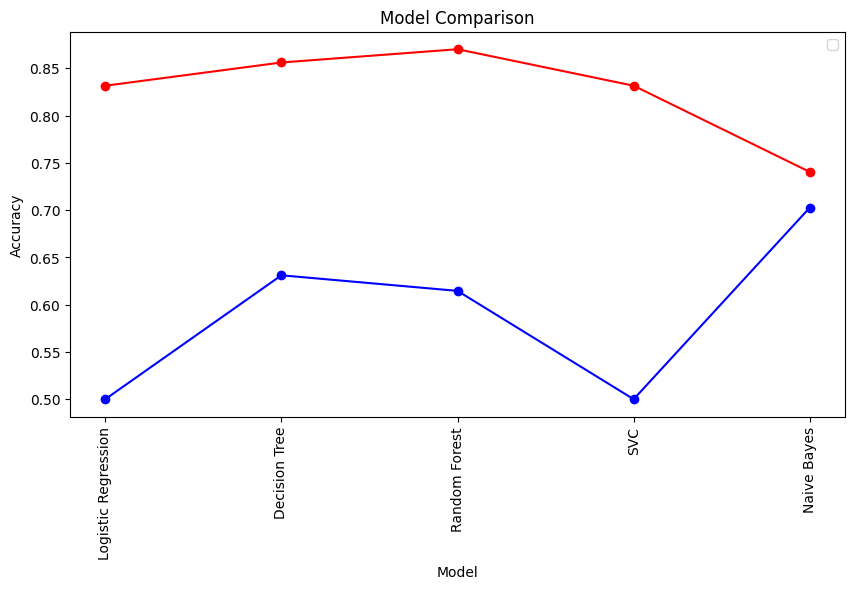

In [ ]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.8701754385964913
0.6145833333333334


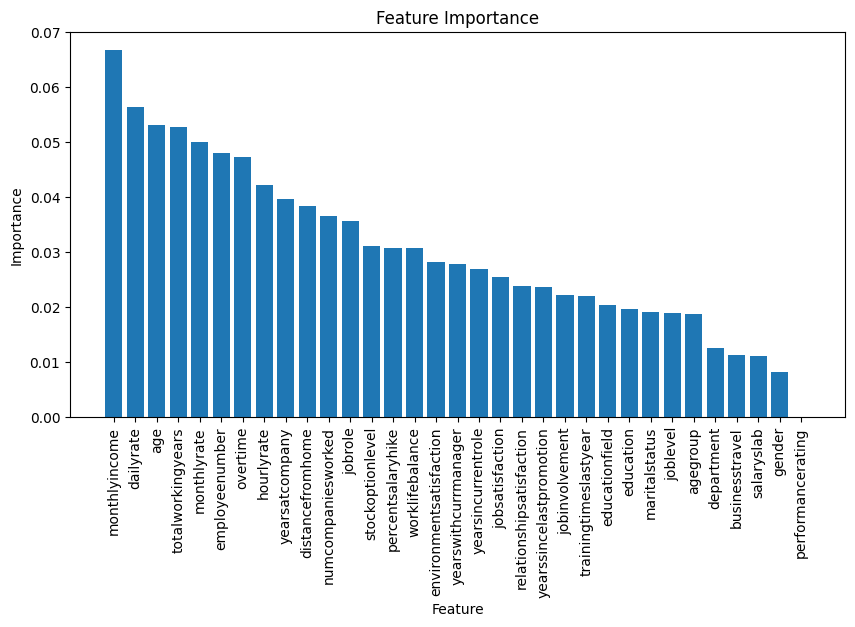

In [ ]:
model = RandomForestClassifier(max_features='auto', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Final Results

#  Random Forest

rf = RandomForestClassifier(max_features='auto', n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Accuracy Score:  0.8631578947368421
ROC AUC Score:  0.59375


In [ ]:
#Clus


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
kmeans.fit(scaled_data)

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Explore the clustered data
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns
)
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         age  agegroup  attrition  businesstravel   dailyrate  department  \
0  48.053435  2.755725   0.068702        2.610687  883.122137    1.236641   
1  45.675159  2.490446   0.108280        2.554140  756.961783    1.261146   
2  36.956422  1.660550   0.091743        2.444954  832.580275    1.066514   
3  29.412607  0.868195   0.386819        2.587393  747.510029    1.406877   
4  36.285714  1.582857   0.082857        2.368571  808.080000    1.377143   

   distancefromhome  education  educationfield  employeenumber  ...  \
0          9.763359   3.106870        2.274809      989.519084  ...   
1          9.146497   2.974522        2.152866     1012.101911  ...   
2          9.149083   3.048165        2.160550     1152.059633  ...   
3          8.954155   2.558739        2.352436      990.157593  ...   
4          9.577143   2.974286        2.297143     1077.725714  ...   

   relationshipsatisfaction  stockoptionlevel  totalworkingyears  \
0                  2.748092          0.675

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



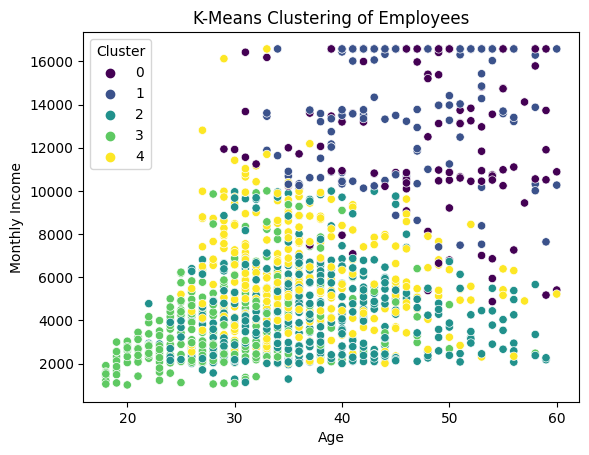

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
kmeans.fit(scaled_data)

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_
# Visualize the clusters using Seaborn
sns.scatterplot(
    x='age',
    y='monthlyincome',
    hue='Cluster',
    data=df,
    palette='viridis',  # You can change the color palette as needed
    legend='full'
)
plt.title('K-Means Clustering of Employees')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

In [ ]:
import plotly.express as px
# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_
# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    df, x='age', y='monthlyincome', z='totalworkingyears',
    color='Cluster', symbol='Cluster', opacity=0.7,
    labels={'age': 'Age', 'monthlyincome': 'Monthly Income', 'totalworkingyears': 'Total Working Years'},
    title='K-Means Clustering in 3D'
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Monthly Income'),
        zaxis=dict(title='Total Working Years'),
    )
)

fig.show()

In [ ]:
cluster_avg = df.groupby('Cluster').mean()
print(cluster_avg)

               age  agegroup  attrition  businesstravel   dailyrate  \
Cluster                                                               
0        48.053435  2.755725   0.068702        2.610687  883.122137   
1        45.675159  2.490446   0.108280        2.554140  756.961783   
2        36.956422  1.660550   0.091743        2.444954  832.580275   
3        29.412607  0.868195   0.386819        2.587393  747.510029   
4        36.285714  1.582857   0.082857        2.368571  808.080000   

         department  distancefromhome  education  educationfield  \
Cluster                                                            
0          1.236641          9.763359   3.106870        2.274809   
1          1.261146          9.146497   2.974522        2.152866   
2          1.066514          9.149083   3.048165        2.160550   
3          1.406877          8.954155   2.558739        2.352436   
4          1.377143          9.577143   2.974286        2.297143   

         employeenumber  

In [ ]:
#SVM

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your data into a DataFrame (replace 'your_hr_data.csv' with your actual file name)

# Feature columns and target variable
X = df1.drop(['performancerating'], axis=1)  # Drop unnecessary columns
y = df1['performancerating']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets after imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create the SVM model
svm_model = SVC(kernel='linear')  # You can try different kernels and parameters

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9831081081081081
Classification Report:
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       252
           4       0.95      0.93      0.94        44

    accuracy                           0.98       296
   macro avg       0.97      0.96      0.97       296
weighted avg       0.98      0.98      0.98       296



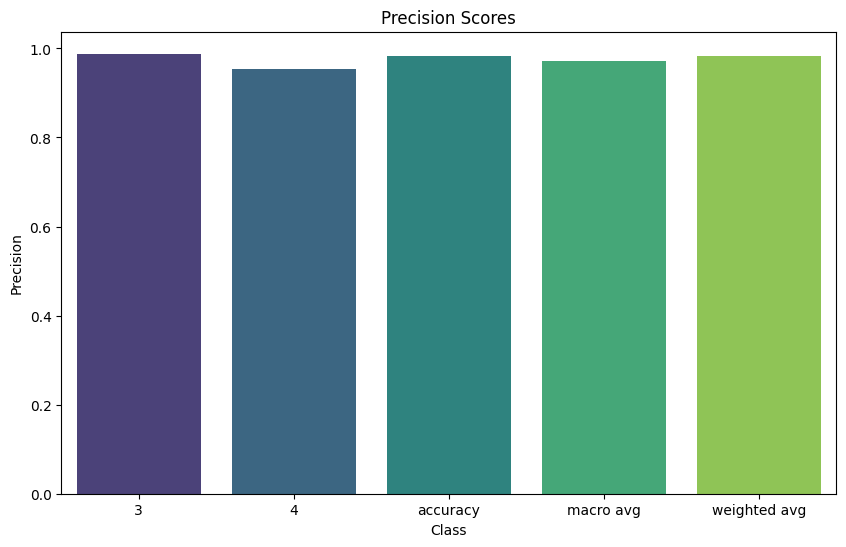

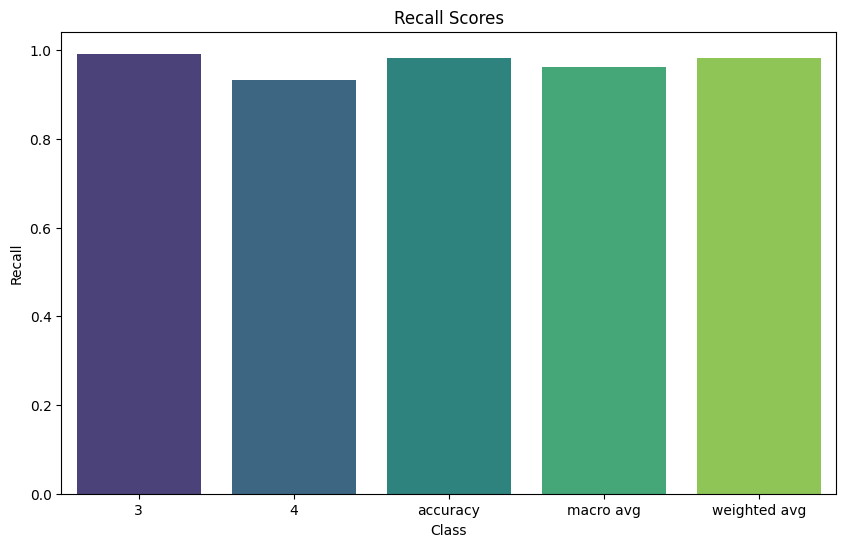

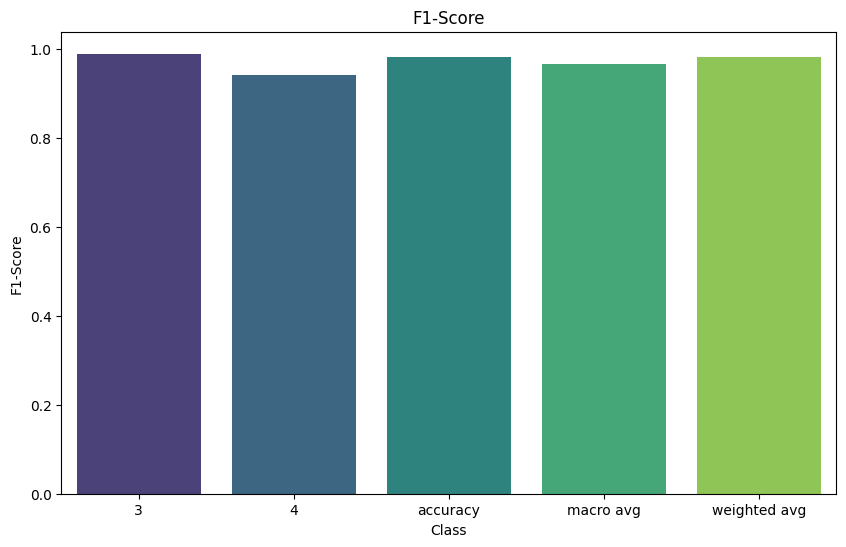

In [ ]:
report = '''
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       252
           4       0.95      0.93      0.94        44

    accuracy                           0.98       296
   macro avg       0.97      0.96      0.97       296
weighted avg       0.98      0.98      0.98       296
'''

# Convert the classification report string into a dictionary
report_dict = classification_report(y_test, predictions, output_dict=True)

# Convert the dictionary to a DataFrame for visualization
report_df = pd.DataFrame(report_dict).transpose()

# Plotting the precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index, y=report_df['precision'], palette='viridis')
plt.title('Precision Scores')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index, y=report_df['recall'], palette='viridis')
plt.title('Recall Scores')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index, y=report_df['f1-score'], palette='viridis')
plt.title('F1-Score')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.show()